# Iris Flower Classifier 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
train = pd.read_csv('Iris dataset.csv')
train

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
train.shape


(150, 5)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Here we can see that there is no null value in the data set and the data type of the numerical values is also same . this tells us that the data is already clean and doesn not need preprocessing and data cleaning

In [10]:
import seaborn as sns 

# EDA

In [5]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df1 = pd.DataFrame(train)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df1['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Outliers checking 

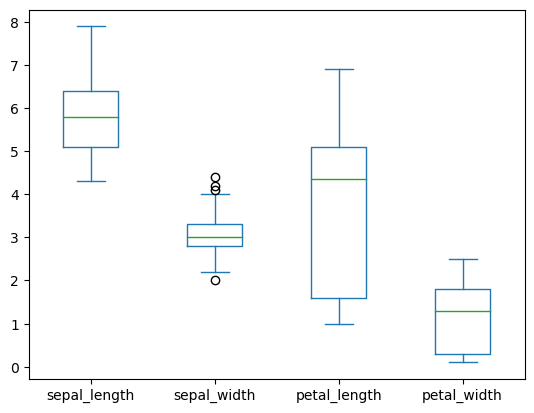

In [8]:
df1.plot(kind = 'box')
plt.show()

# Scatter plot 

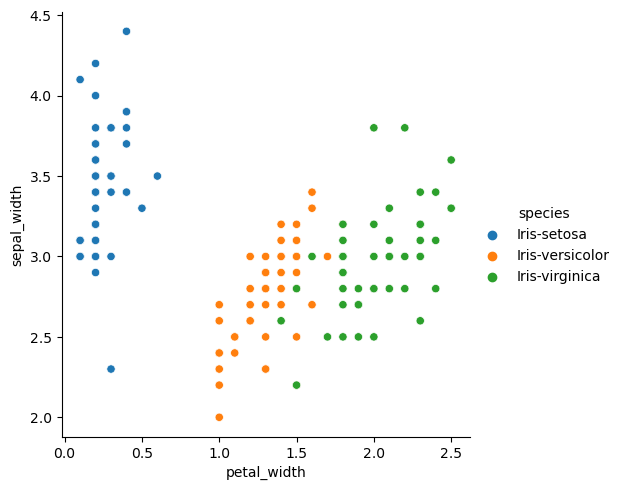

In [11]:
sns.relplot(
    data=df1,
    x="petal_width", y="sepal_width",
    hue="species")

from the scater plot we can clearly see there are some points of one class of flowers with are mixed with the other class of flowers although we can still differenciate between them properly we cxan find  some outliers.

from the scare plot we can clearly see that we can group the species in groups based on the given features.
grouping is easy in knn 
so here we use knn and logestic regression.


In [16]:
from pandas.plotting import scatter_matrix

# Understanding the distribution of data 

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

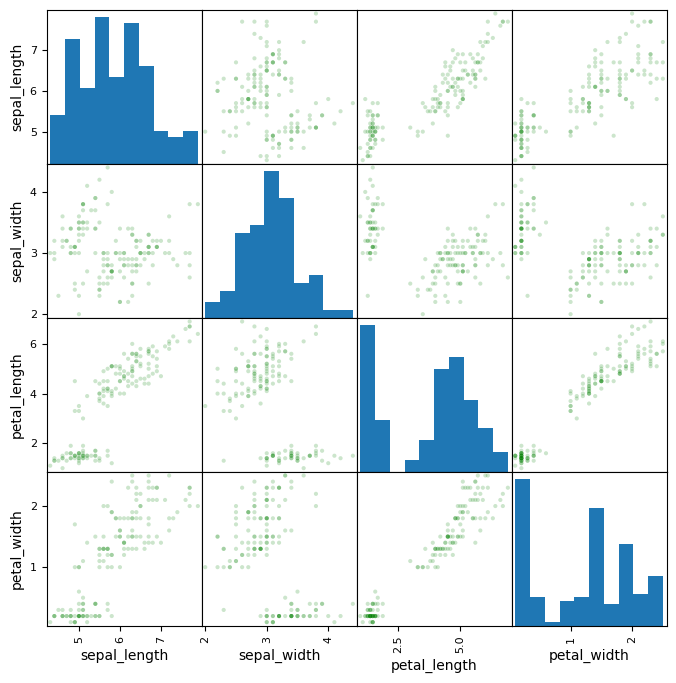

In [22]:
scatter_matrix(df1 , alpha = 0.2 , figsize=(8,8),color = 'green' )

The  histograms clearly shows that the data point of the features are not normally distributed.
The scatter plots show that  we can easily understand from the features that the satotsa flowers are always on the side although the other two are mixed with each other a little still you cam esaliy seprate them from each other 

# Correlation Matrix

In [24]:

df1.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

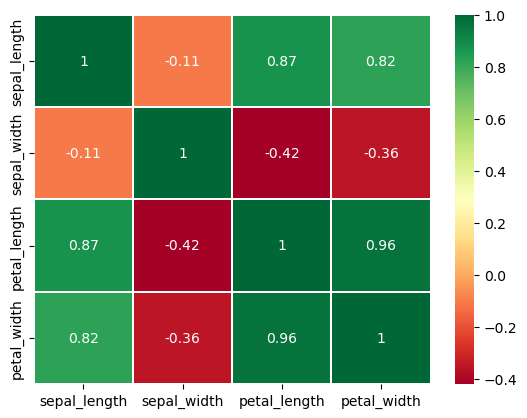

In [27]:
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})

# Label Encoder

In [28]:
import sklearn as sk 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [30]:
df1['species'] = le.fit_transform(df1['species'])
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training 

In [35]:
from sklearn.model_selection import train_test_split
x = df1.drop(columns=['species']) 
y = df1['species'] 




# Fitting a Logestic Regression model

In [61]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # this is initialisation
model.fit(x,y) # model training 


LogisticRegression()

# Accuracy

In [64]:
# print performance matrix
print(" Accuracy for logistic regression : ",  model.score(x ,y)*100)

 Accuracy for logistic regression :  97.33333333333334


# Make Predicitions 

In [65]:
expected = y
predicted = model.predict(x)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
from sklearn import metrics 

# summarize the fit of the model

In [67]:
print(metrics.classification_report(expected , predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [68]:
print(metrics.confusion_matrix(expected , predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


Here we can see that our model perfectly classificies satosa as the f1 score of 0 with is Iris-satosa is 1 . 
where as the f1 score of Iris-versicolor is 0.96 from the confusion matrix we can see that the model correctly classifies 47 out of 50 as Iris-versicolor. 
where as the f1 score of Iris-virginica  is 0.96from the confusion matrix we can see that the model correctly classifies 49 out of 50 flowers ofIris-virginica  .

# Fitting a KNN Model

In [69]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(x,y)

KNeighborsClassifier()

# Accuracy

In [70]:


print(" Accuracy for KNN : ",  model1.score(x ,y)*100)

 Accuracy for KNN :  96.66666666666667


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Make Predicitions 


In [71]:
expected = y
predicted2 = model1.predict(x)
predicted2

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# summarize the fit of the model 

In [72]:
print(metrics.classification_report(expected , predicted2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [73]:
print(metrics.confusion_matrix(expected , predicted2))

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


Here we can see that our model perfectly classificies satosa as the f1 score of 0 with is Iris-satosa is 1 . 
where as the f1 score of Iris-versicolor is 0.95 from the confusion matrix we can see that the model correctly classifies 47 out of 50 as Iris-versicolor. 
where as the f1 score of Iris-virginica  is 0.95 from the confusion matrix we can see that the model correctly classifies 48 out of 50 flowers ofIris-virginica  .

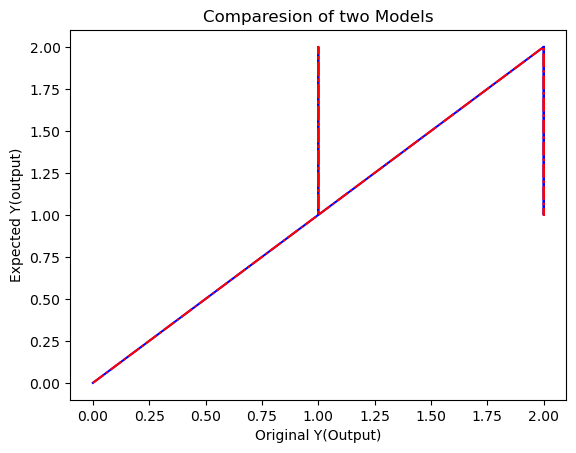

In [90]:
plt.plot(expected, predicted ,'-', color = 'blue')
plt.plot(expected, predicted2 , '-.' ,color = 'red')
plt.xlabel("Original Y(Output)")
plt.ylabel("Expected Y(output)")
plt.title('Comparesion of two Models')
plt.show()

# Comparesion of two Models

In [91]:
print(metrics.confusion_matrix(expected , predicted)) # for  logistic regression

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [92]:
print(metrics.confusion_matrix(expected , predicted2)) # for KNN

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


from the confusion matrix and Accuracy we can say that Logistic regression is a better model for classification for this data set.

# Conclusion 

1.  Accuracy for logistic regression :  97.33333333333334
2. Accuracy for KNN :  96.66666666666667
3.Logistic regression is a better model for classification for this data set.